In [1]:
import pandas as pd
from fbprophet import Prophet
pd.options.mode.chained_assignment = None
import numpy as np

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
USDdaily = pd.read_csv("../USDPLN_Candlestick_1_D_BID_01.11.2009-09.11.2019.csv")
APPLE = pd.read_csv("../AAPL.USUSD_Candlestick_1_D_BID_26.01.2017-09.11.2019.csv")
USDhourly = pd.read_csv("../USDPLN_Candlestick_1_Hour_BID_06.10.2009-02.11.2019.csv")
EURMonthly = pd.read_csv("../EURPLN_Candlestick_1_M_BID_19.08.2019-18.10.2019.csv")

In [3]:
USDdaily.tail()

,DateTime,Open,High,Low,Close,Volume
3657,05.11.2019 23:00:00.000 GMT+0100,3.84969,3.85785,3.84539,3.85305,57634.11
3658,06.11.2019 23:00:00.000 GMT+0100,3.85154,3.85756,3.84393,3.85115,79446.24
3659,07.11.2019 23:00:00.000 GMT+0100,3.85124,3.87265,3.85077,3.85936,57538.88
3660,08.11.2019 23:00:00.000 GMT+0100,3.85936,3.85936,3.85936,3.85936,0.00
3661,09.11.2019 23:00:00.000 GMT+0100,3.85936,3.85936,3.85936,3.85936,0.00


In [4]:
EURMonthly.tail()

,DateTime,Open,High,Low,Close,Volume
87835,18.10.2019 23:55:00.000,4.27735,4.27735,4.27735,4.27735,0.0
87836,18.10.2019 23:56:00.000,4.27735,4.27735,4.27735,4.27735,0.0
87837,18.10.2019 23:57:00.000,4.27735,4.27735,4.27735,4.27735,0.0
87838,18.10.2019 23:58:00.000,4.27735,4.27735,4.27735,4.27735,0.0
87839,18.10.2019 23:59:00.000,4.27735,4.27735,4.27735,4.27735,0.0


In [5]:
USDhourly.tail()

,DateTime,Open,High,Low,Close,Volume
88316,02.11.2019 19:00:00.000 GMT+0100,3.80516,3.80516,3.80516,3.80516,0.0
88317,02.11.2019 20:00:00.000 GMT+0100,3.80516,3.80516,3.80516,3.80516,0.0
88318,02.11.2019 21:00:00.000 GMT+0100,3.80516,3.80516,3.80516,3.80516,0.0
88319,02.11.2019 22:00:00.000 GMT+0100,3.80516,3.80516,3.80516,3.80516,0.0
88320,02.11.2019 23:00:00.000 GMT+0100,3.80516,3.80516,3.80516,3.80516,0.0


In [6]:
APPLE.tail()

,DateTime,Open,High,Low,Close,Volume
1014,05.11.2019 23:00:00.000 GMT+0100,256.778,257.468,255.347,257.158,662.690
1015,06.11.2019 23:00:00.000 GMT+0100,258.708,260.337,257.158,259.428,705.565
1016,07.11.2019 23:00:00.000 GMT+0100,258.708,260.108,256.817,260.088,632.725
1017,08.11.2019 23:00:00.000 GMT+0100,260.088,260.088,260.088,260.088,0.000
1018,09.11.2019 23:00:00.000 GMT+0100,260.088,260.088,260.088,260.088,0.000


In [7]:
def get_open_data(df):
    df = df.iloc[:,0:2]
    df.columns = ["ds","y"]
    return df

In [8]:
def convert_dates(df):
    df['ds'].dtypes
    df['ds'] = pd.to_datetime(df['ds'], errors='ignore', utc=True)
    for i in range(df['ds'].size):
        df['ds'][i] = df['ds'][i].replace(tzinfo=None)
    return df

In [9]:
def count_diff_DF(df):
    for i in range(df['y'].size - 1):
        if i == df['y'].size:
            df['y'][i] = 0
        else:
            df['y'][i] = df['y'][i+1] - df['y'][i]
    return df

In [10]:
USDdaily = get_open_data(USDdaily)
USDhourly = get_open_data(USDhourly)
EURMonthly = get_open_data(EURMonthly)
APPLE = get_open_data(APPLE)


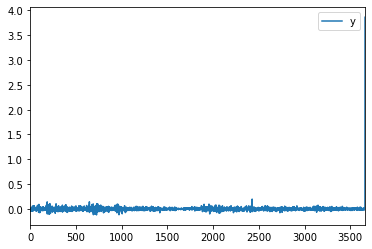

In [11]:
USDdaily = count_diff_DF(USDdaily)
USDdaily.plot()

In [12]:
USDdaily_converted = convert_dates(USDdaily)

In [13]:
m_USD_daily = Prophet()
m_USD_daily.fit(USDdaily_converted)

In [14]:
future_USD_daily = m_USD_daily.make_future_dataframe(periods=365)

In [15]:
future_USD_daily.tail()

,ds
4022,2020-12-06 01:00:00
4023,2020-12-07 01:00:00
4024,2020-12-08 01:00:00
4025,2020-12-09 01:00:00
4026,2020-12-10 01:00:00


In [16]:
forecast_USD_daily = m_USD_daily.predict(future_USD_daily)

In [17]:
forecast_USD_daily[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4022,2020-12-06 01:00:00,0.016774,-0.070510,0.100778
4023,2020-12-07 01:00:00,0.016659,-0.067694,0.098070
4024,2020-12-08 01:00:00,0.014621,-0.067477,0.097976
4025,2020-12-09 01:00:00,0.016614,-0.073396,0.104042
4026,2020-12-10 01:00:00,0.020770,-0.069773,0.110997


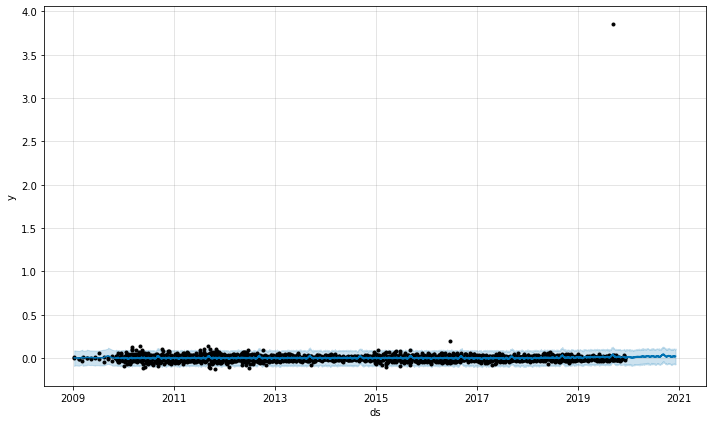

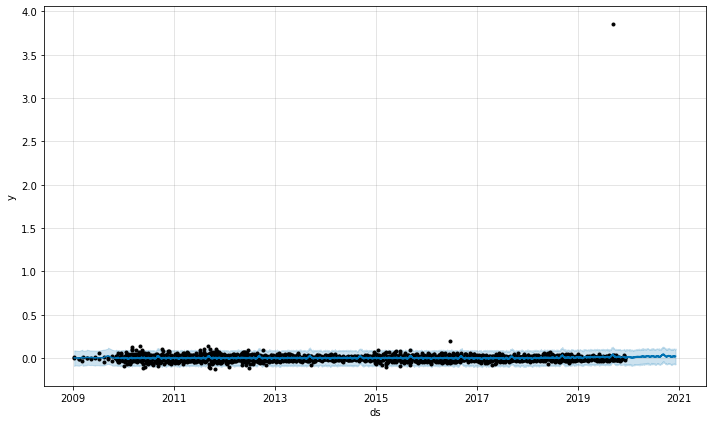

In [18]:
m_USD_daily.plot(forecast_USD_daily)

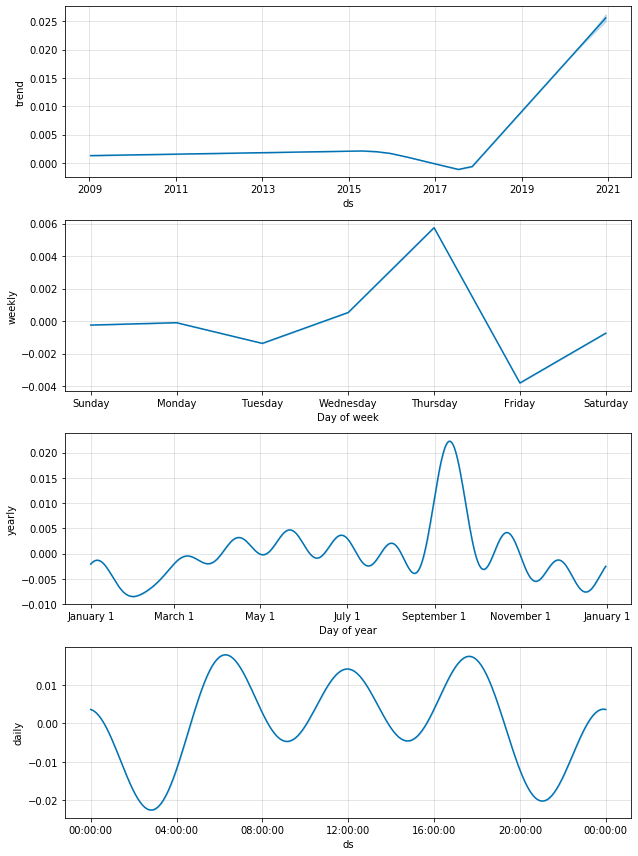

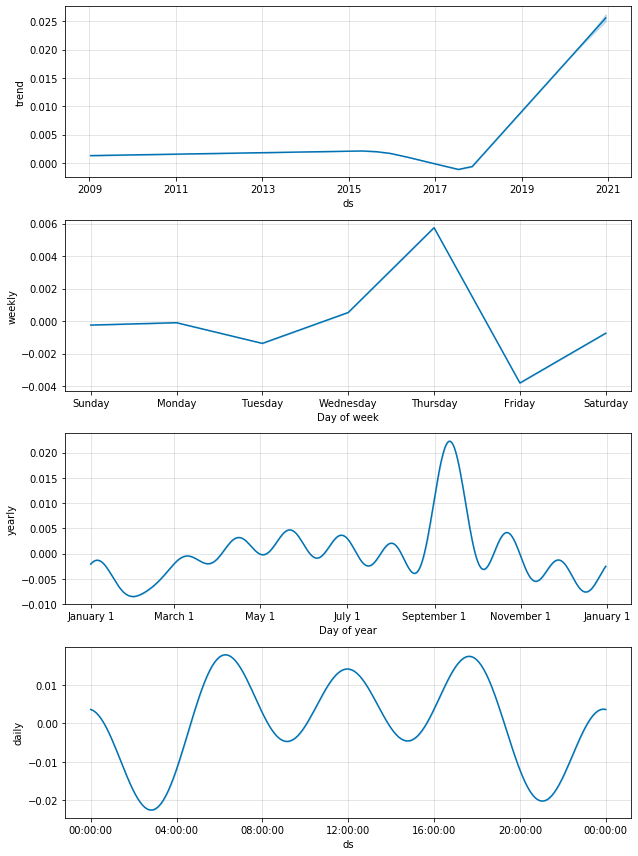

In [19]:
m_USD_daily.plot_components(forecast_USD_daily)

In [21]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import accuracy_score


In [23]:
df_cv_usd_daily = cross_validation(m_USD_daily, initial='2920 days', period='180 days', horizon = '365 days')
df_cv_usd_daily.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-06-19 01:00:00 and 2018-12-11 01:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-20 01:00:00,0.000121,-0.031809,0.032947,0.03320,2017-06-19 01:00:00
1,2017-06-21 01:00:00,0.003936,-0.026120,0.036246,-0.00578,2017-06-19 01:00:00
2,2017-06-22 01:00:00,0.000715,-0.031719,0.031431,-0.01428,2017-06-19 01:00:00
3,2017-06-23 01:00:00,0.000002,-0.031722,0.031994,-0.02845,2017-06-19 01:00:00
4,2017-06-24 01:00:00,0.002618,-0.029001,0.034933,0.00000,2017-06-19 01:00:00


In [25]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv_usd_daily)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,36 days 00:00:00,0.000272,0.016502,0.011991,0.911972
1,36 days 23:00:00,0.000263,0.016219,0.011772,0.919014
2,37 days 00:00:00,0.000270,0.016431,0.011858,0.915493
3,37 days 23:00:00,0.000271,0.016447,0.011901,0.915493
4,38 days 00:00:00,0.000269,0.016409,0.011841,0.915493


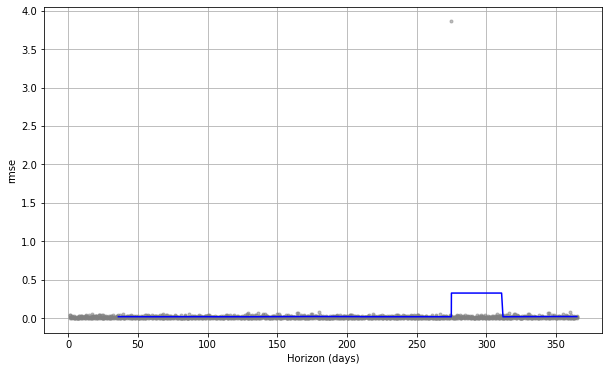

In [28]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_usd_daily, metric='rmse')

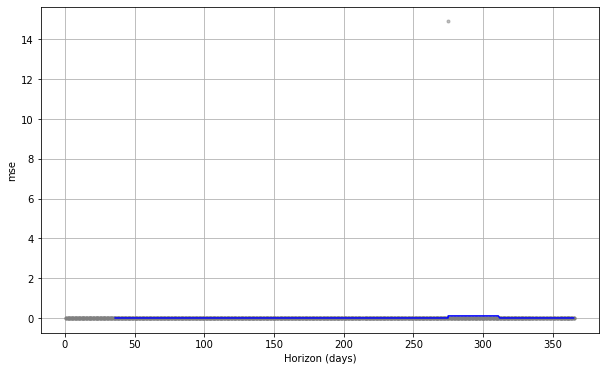

In [29]:
fig = plot_cross_validation_metric(df_cv_usd_daily, metric='mse')

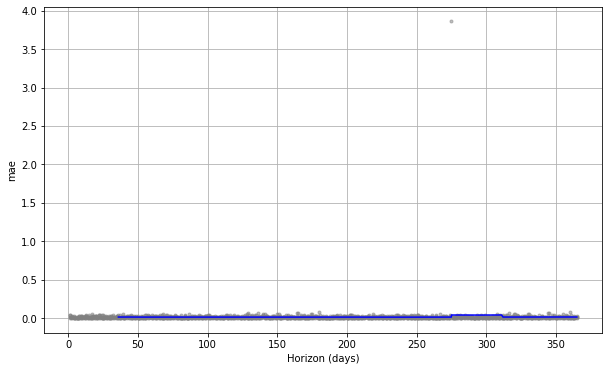

In [30]:
fig = plot_cross_validation_metric(df_cv_usd_daily, metric='mae')

In [ ]:
def convert_to_0_1(df):
    df.loc[df.y <= 0, 'y'] = 0
    df.loc[df.y > 0, 'y'] = 1
    return df

In [ ]:
USDdaily_binary = convert_to_0_1(USDdaily)